In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import itertools as it
import scipy


C:\Users\parig\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
file_path="C:\\Users\parig\OneDrive\Desktop\grn_sol2.csv"
grn=pd.read_csv(file_path,index_col=None)
grn

,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34
0,1,2,21,5.933762,-5.450090,-2.396844,-9.290894,7.400069,-0.651981
1,1,2,79,5.933762,-5.450090,-2.396844,1.496332,1.279846,-0.651981
2,2,1,100,4.180594,-1.341432,-0.217802,-12.149013,5.521167,0.862551
3,3,1,100,0.626240,7.447541,5.040066,10.368736,-10.051472,1.336439
4,4,3,93,4.805035,1.047177,-8.310965,-20.602543,5.413498,8.264311
...,...,...,...,...,...,...,...,...,...
15188,9997,1,100,2.534453,6.609353,0.933689,11.970565,-0.755470,0.030261
15189,9998,1,100,2.207966,6.785881,1.569295,8.895876,-0.684923,0.731361
15190,9999,1,100,3.998492,0.528893,-4.493082,-21.121698,4.437683,7.141779
15191,10000,2,47,0.705234,5.447871,-0.741399,4.078977,-5.837886,7.715995


In [3]:
grn.loc[:,'AMPK':'miR34']=(grn.loc[:,'AMPK':'miR34']-grn.loc[:,'AMPK':'miR34'].mean())/grn.loc[:,'AMPK':'miR34'].std()
grn


,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34
0,1,2,21,1.722687,-1.706221,-0.111950,-0.457562,1.192055,-1.667457
1,1,2,79,1.722687,-1.706221,-0.111950,0.455510,0.211561,-1.667457
2,2,1,100,0.880834,-0.792532,0.404204,-0.699484,0.891044,-1.150466
3,3,1,100,-0.825928,1.161971,1.649643,1.206505,-1.603778,-0.988702
4,4,3,93,1.180684,-0.261350,-1.512837,-1.415023,0.873795,1.376154
...,...,...,...,...,...,...,...,...,...
15188,9997,1,100,0.090375,0.975574,0.676959,1.342090,-0.114507,-1.434571
15189,9998,1,100,-0.066400,1.014830,0.827516,1.081836,-0.103205,-1.195248
15190,9999,1,100,0.793391,-0.376607,-0.608489,-1.458967,0.717464,0.992973
15191,10000,2,47,-0.787996,0.717282,0.280178,0.674115,-0.928738,1.188984


<Axes: xlabel='AMPK', ylabel='mTOR'>

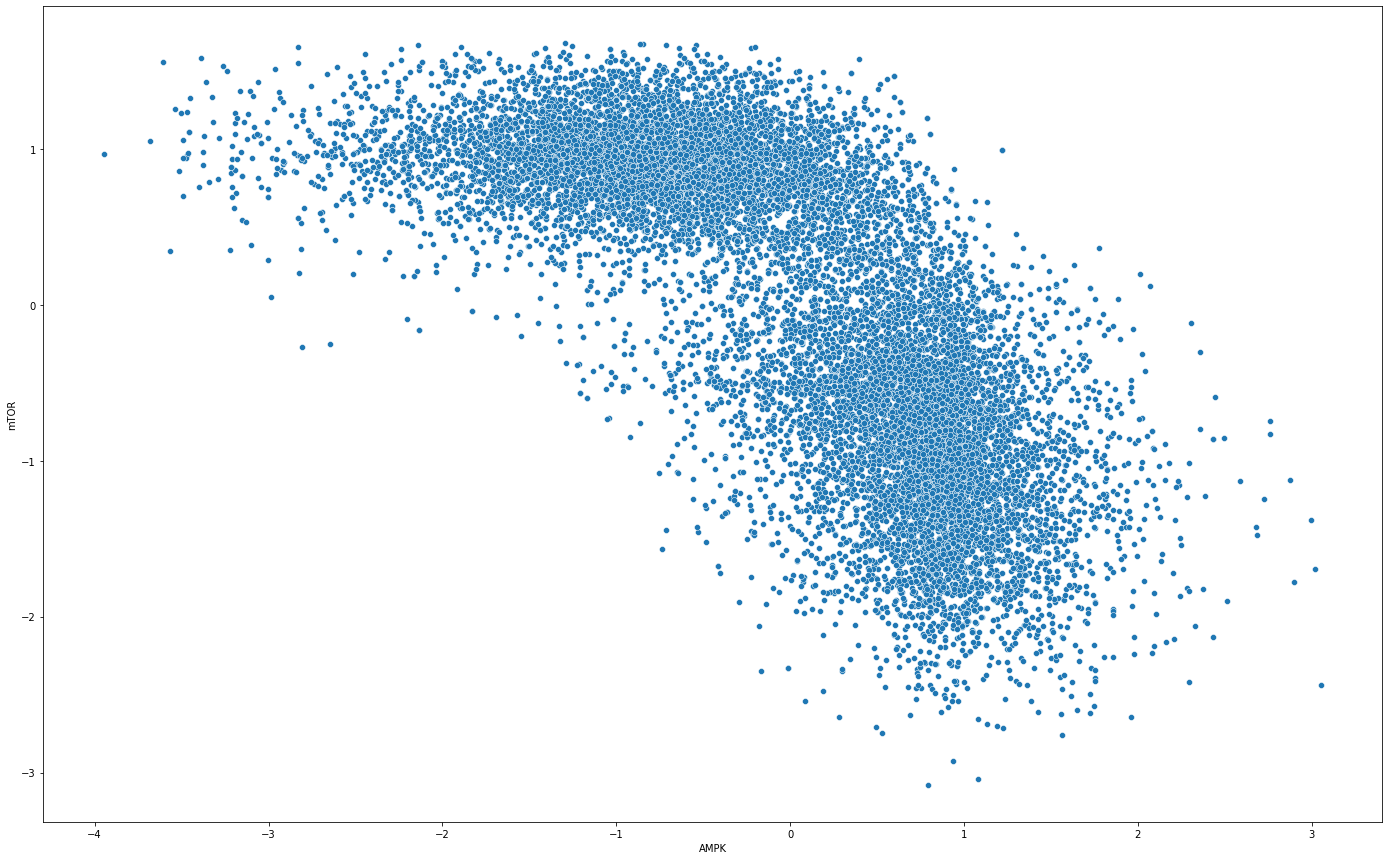

In [4]:
plt.figure(figsize=(24,15))
sns.scatterplot(x=grn['AMPK'],y=grn['mTOR'])

<Axes: xlabel='AMPK', ylabel='ZEB'>

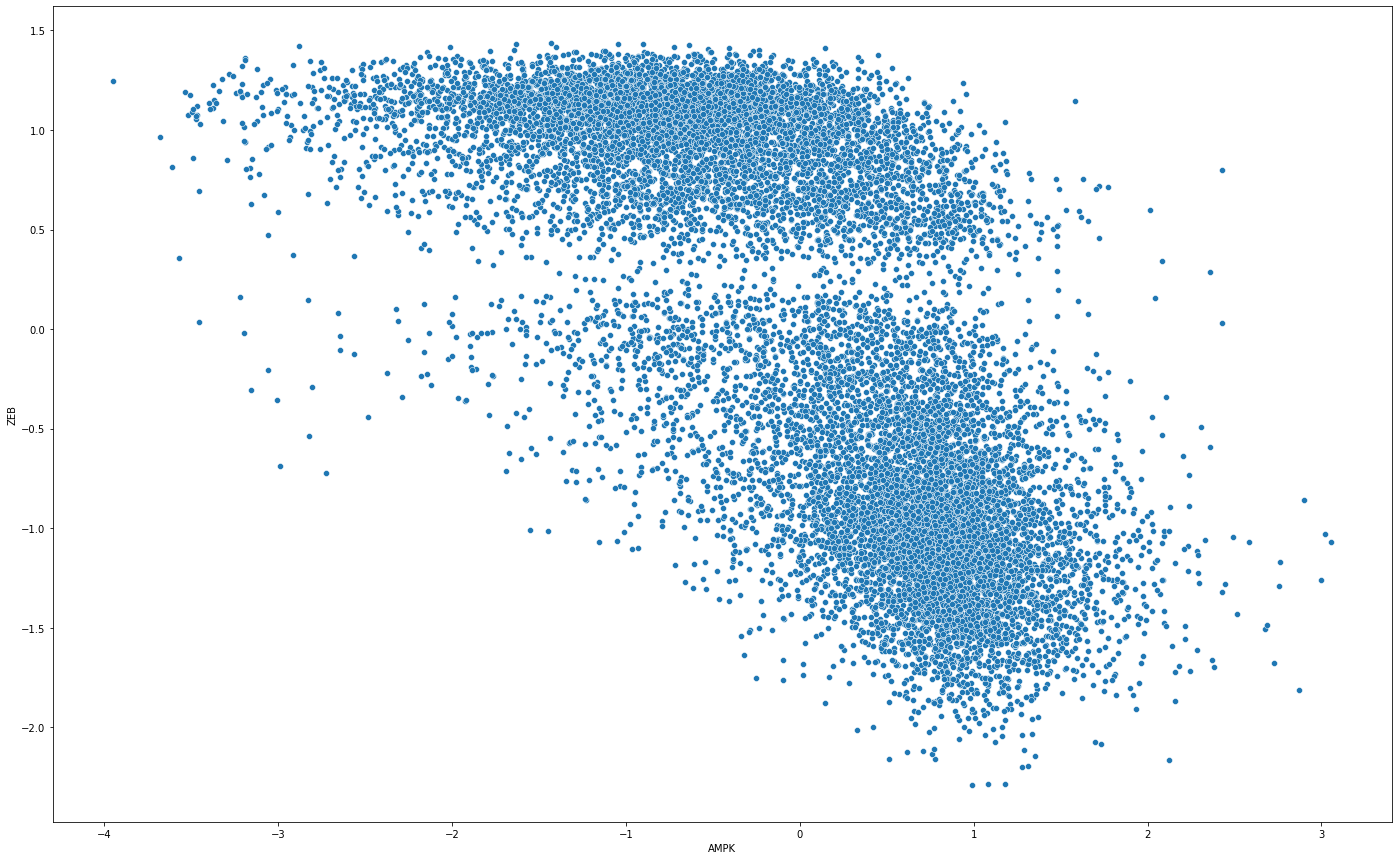

In [5]:
plt.figure(figsize=(24,15))
sns.scatterplot(x=grn['AMPK'],y=grn['ZEB'])

In [6]:
g= grn.iloc[:,5]
g

0       -0.111950
1       -0.111950
2        0.404204
3        1.649643
4       -1.512837
           ...   
15188    0.676959
15189    0.827516
15190   -0.608489
15191    0.280178
15192   -1.274775
Name: SNAIL , Length: 15193, dtype: float64

<Axes: xlabel='AMPK', ylabel='SNAIL '>

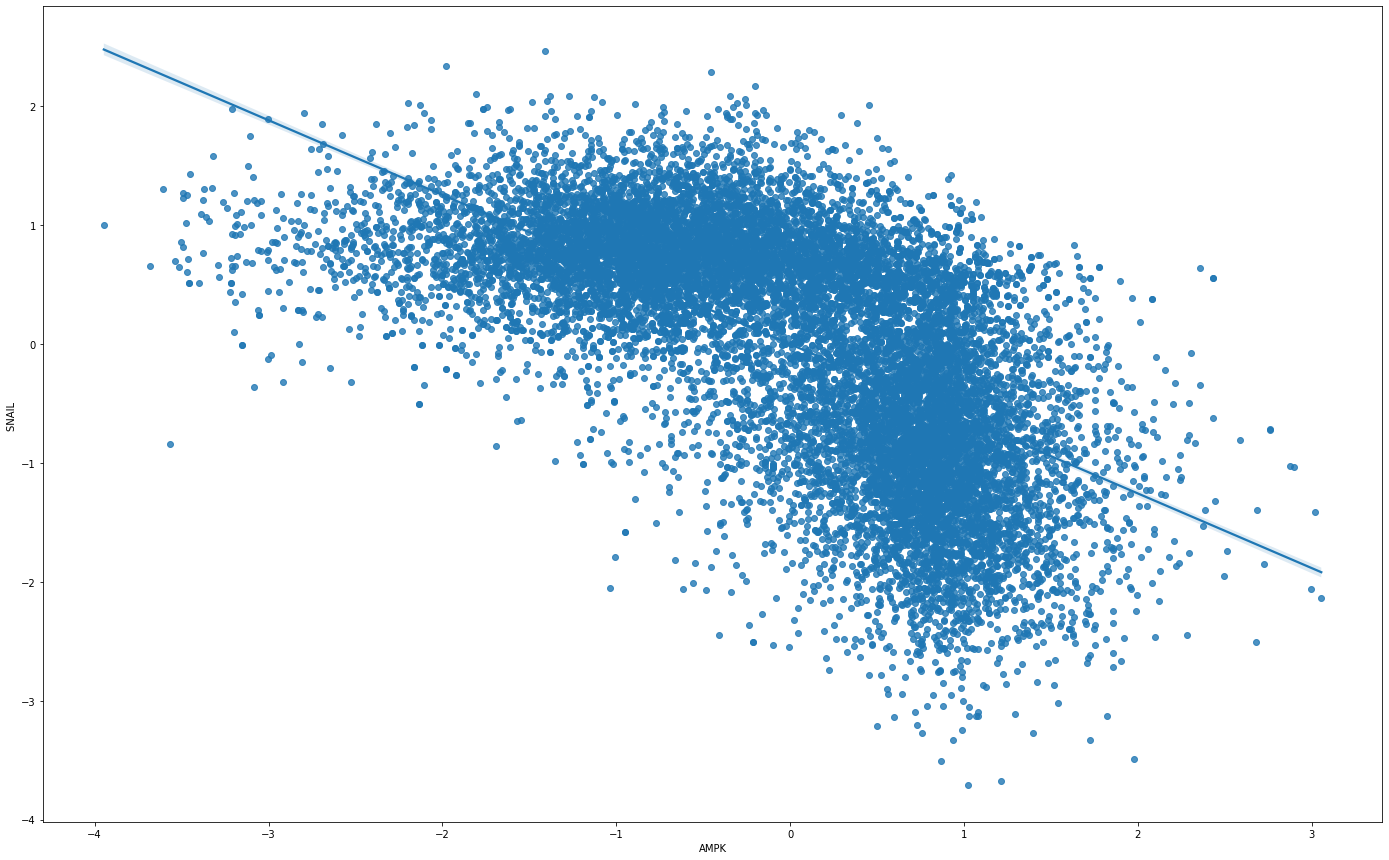

In [7]:
plt.figure(figsize=(24,15))
sns.regplot(x=grn['AMPK'],y=g)

<Axes: xlabel='mTOR', ylabel='SNAIL '>

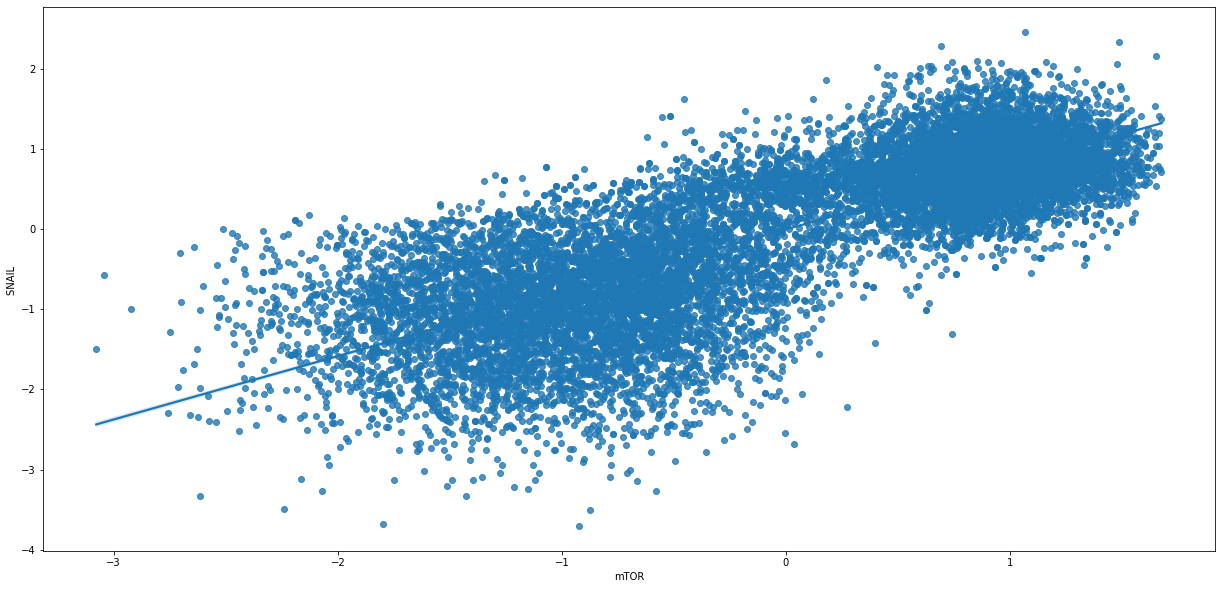

In [8]:
plt.figure(figsize=(21,10))
sns.regplot(x=grn['mTOR'],y=g)

In [9]:
grn.describe()

,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34
count,15193.000000,15193.000000,15193.000000,1.519300e+04,1.519300e+04,1.519300e+04,1.519300e+04,1.519300e+04,1.519300e+04
mean,5005.268545,1.846442,65.819785,-7.202237e-17,-2.139625e-17,-1.847327e-17,-2.946370e-17,-3.624502e-17,-1.566720e-16
std,2891.181673,0.832336,33.290257,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,1.000000,1.000000,-3.947484e+00,-3.078031e+00,-3.706917e+00,-2.287583e+00,-2.785027e+00,-3.493011e+00
25%,2483.000000,1.000000,36.000000,-7.247982e-01,-8.445589e-01,-7.807743e-01,-9.591873e-01,-8.940776e-01,-8.164711e-01
50%,5012.000000,2.000000,69.000000,1.742250e-01,1.751240e-01,2.810291e-01,-3.228126e-04,2.105622e-01,1.657741e-01
75%,7510.000000,2.000000,100.000000,7.933910e-01,8.986252e-01,7.762412e-01,1.011716e+00,9.278240e-01,8.345162e-01
max,10000.000000,6.000000,100.000000,3.054453e+00,1.676057e+00,2.467088e+00,1.434154e+00,1.592598e+00,1.920080e+00


In [10]:
grn.loc[:,'metabolic score']=grn.loc[:,'AMPK']-grn.loc[:,'mTOR']
grn

,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34,metabolic score
0,1,2,21,1.722687,-1.706221,-0.111950,-0.457562,1.192055,-1.667457,3.428907
1,1,2,79,1.722687,-1.706221,-0.111950,0.455510,0.211561,-1.667457,3.428907
2,2,1,100,0.880834,-0.792532,0.404204,-0.699484,0.891044,-1.150466,1.673366
3,3,1,100,-0.825928,1.161971,1.649643,1.206505,-1.603778,-0.988702,-1.987899
4,4,3,93,1.180684,-0.261350,-1.512837,-1.415023,0.873795,1.376154,1.442034
...,...,...,...,...,...,...,...,...,...,...
15188,9997,1,100,0.090375,0.975574,0.676959,1.342090,-0.114507,-1.434571,-0.885199
15189,9998,1,100,-0.066400,1.014830,0.827516,1.081836,-0.103205,-1.195248,-1.081231
15190,9999,1,100,0.793391,-0.376607,-0.608489,-1.458967,0.717464,0.992973,1.169998
15191,10000,2,47,-0.787996,0.717282,0.280178,0.674115,-0.928738,1.188984,-1.505278


<ipython-input-14-3ab80cfcddd3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grn["metabolic score"], bins=120, kde=True, color='purple', hist_kws={'alpha': 0.5, 'fill': True})


Text(0, 0.5, 'Frequency')

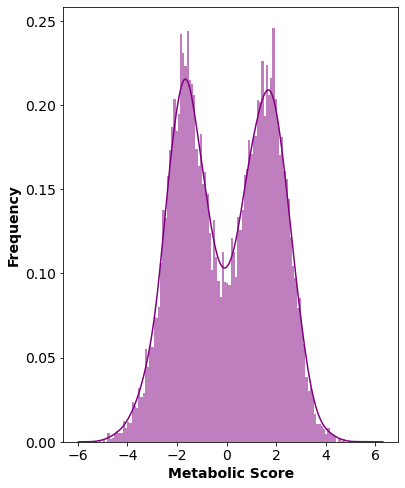

In [14]:
plt.figure(figsize=(6,8))
#plt.rcParams['figure.dpi']= 200
sns.distplot(grn["metabolic score"], bins=120, kde=True, color='purple', hist_kws={'alpha': 0.5, 'fill': True})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Metabolic Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

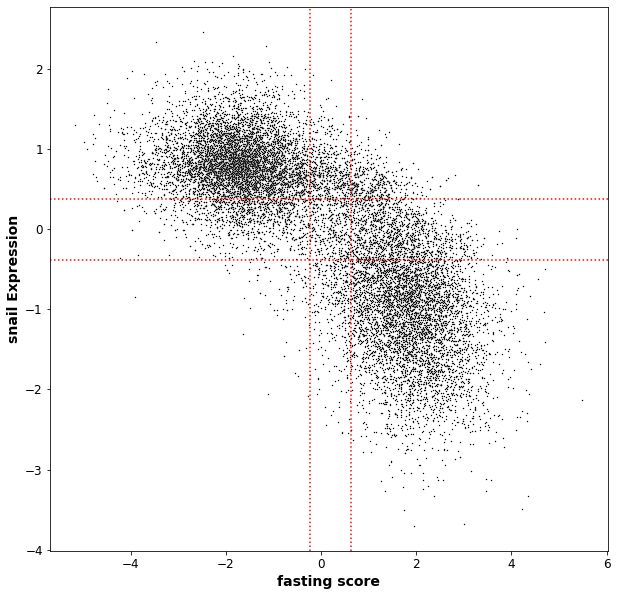

In [15]:
plt.figure(figsize=(10, 10))
#sns.set_style("whitegrid")
#plt.grid(False)

plo = sns.scatterplot(data=grn, x="metabolic score", y=g, s = 2, color='Black' )

plt.xlabel("fasting score", fontweight='bold', size=14)
plt.ylabel('snail Expression',  fontweight='bold' , size=14 )
plt.xticks(size=12)
plt.yticks(size=12)


plo.plot(grid = False)
plt.axhline(y = -0.38, color = 'r', linestyle = ':')
plt.axhline(y = 0.38, color = 'r', linestyle = ':')
plt.axvline(x = -0.24, color = 'r', linestyle = ':')
plt.axvline(x = 0.64, color = 'r', linestyle = ':')

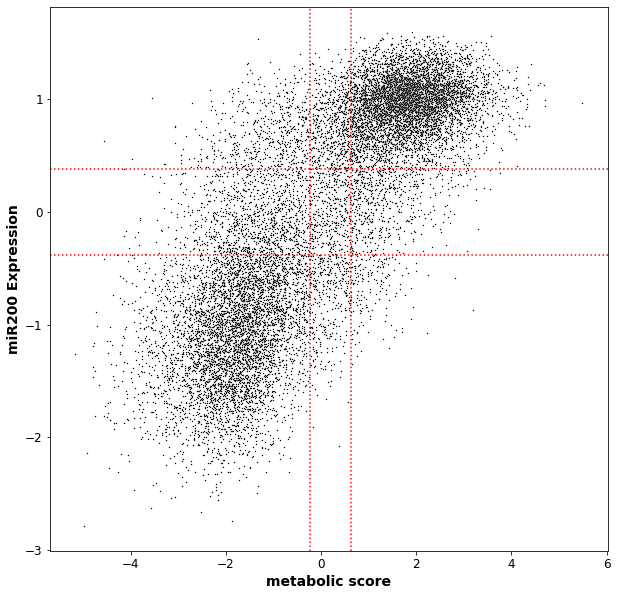

In [16]:
plt.figure(figsize=(10, 10))
#sns.set_style("whitegrid")
#plt.grid(False)

plo = sns.scatterplot(data=grn, x="metabolic score", y="miR200", s = 2, color='Black' )

plt.xlabel("metabolic score", fontweight='bold', size=14)
plt.ylabel('miR200 Expression',  fontweight='bold' , size=14 )
plt.xticks(size=12)
plt.yticks(size=12)


plo.plot(grid = False)
plt.axhline(y = -0.38, color = 'r', linestyle = ':')
plt.axhline(y = 0.38, color = 'r', linestyle = ':')
plt.axvline(x = -0.24, color = 'r', linestyle = ':')
plt.axvline(x = 0.64, color = 'r', linestyle = ':')

In [17]:
grn.loc[:,'EMT score']=g+grn.loc[:,'ZEB']-grn.loc[:,'miR34']-grn.loc[:,'miR200']
grn

,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34,metabolic score,EMT score
0,1,2,21,1.722687,-1.706221,-0.111950,-0.457562,1.192055,-1.667457,3.428907,-0.094109
1,1,2,79,1.722687,-1.706221,-0.111950,0.455510,0.211561,-1.667457,3.428907,1.799457
2,2,1,100,0.880834,-0.792532,0.404204,-0.699484,0.891044,-1.150466,1.673366,-0.035859
3,3,1,100,-0.825928,1.161971,1.649643,1.206505,-1.603778,-0.988702,-1.987899,5.448628
4,4,3,93,1.180684,-0.261350,-1.512837,-1.415023,0.873795,1.376154,1.442034,-5.177810
...,...,...,...,...,...,...,...,...,...,...,...
15188,9997,1,100,0.090375,0.975574,0.676959,1.342090,-0.114507,-1.434571,-0.885199,3.568128
15189,9998,1,100,-0.066400,1.014830,0.827516,1.081836,-0.103205,-1.195248,-1.081231,3.207806
15190,9999,1,100,0.793391,-0.376607,-0.608489,-1.458967,0.717464,0.992973,1.169998,-3.777893
15191,10000,2,47,-0.787996,0.717282,0.280178,0.674115,-0.928738,1.188984,-1.505278,0.694048


<ipython-input-18-5018720803ea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grn["EMT score"], bins=120, kde=True, color='red', hist_kws={'alpha': 0.5, 'fill': True})


Text(0, 0.5, 'Frequency')

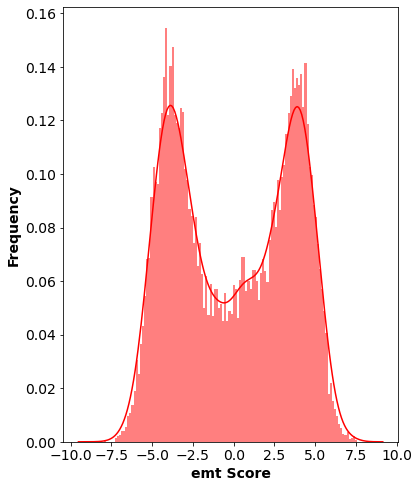

In [18]:
plt.figure(figsize=(6,8))
#plt.rcParams['figure.dpi']= 200
sns.distplot(grn["EMT score"], bins=120, kde=True, color='red', hist_kws={'alpha': 0.5, 'fill': True})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('emt Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

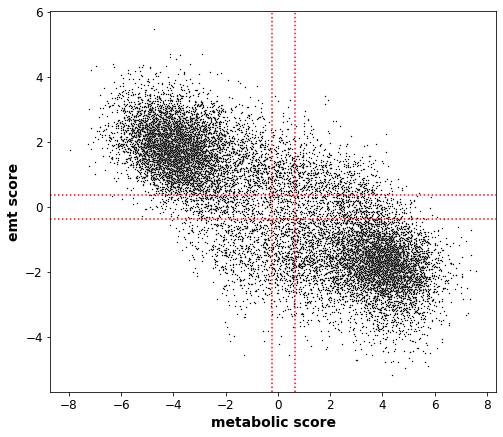

In [16]:
plt.figure(figsize=(8,7))
#sns.set_style("whitegrid")
#plt.grid(False)

plo = sns.scatterplot(data=grn, x="EMT score", y="metabolic score", s = 2, color='Black' )

plt.xlabel("metabolic score", fontweight='bold', size=14)
plt.ylabel('emt score',  fontweight='bold' , size=14 )
plt.xticks(size=12)
plt.yticks(size=12)


plo.plot(grid = False)
plt.axhline(y = -0.38, color = 'r', linestyle = ':')
plt.axhline(y = 0.38, color = 'r', linestyle = ':')
plt.axvline(x = -0.24, color = 'r', linestyle = ':')
plt.axvline(x = 0.64, color = 'r', linestyle = ':')

In [17]:
grn

,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34,metabolic score,EMT score
0,1,2,21,1.722687,-1.706221,-0.111950,-0.457562,1.192055,-1.667457,3.428907,-0.094109
1,1,2,79,1.722687,-1.706221,-0.111950,0.455510,0.211561,-1.667457,3.428907,1.799457
2,2,1,100,0.880834,-0.792532,0.404204,-0.699484,0.891044,-1.150466,1.673366,-0.035859
3,3,1,100,-0.825928,1.161971,1.649643,1.206505,-1.603778,-0.988702,-1.987899,5.448628
4,4,3,93,1.180684,-0.261350,-1.512837,-1.415023,0.873795,1.376154,1.442034,-5.177810
...,...,...,...,...,...,...,...,...,...,...,...
15188,9997,1,100,0.090375,0.975574,0.676959,1.342090,-0.114507,-1.434571,-0.885199,3.568128
15189,9998,1,100,-0.066400,1.014830,0.827516,1.081836,-0.103205,-1.195248,-1.081231,3.207806
15190,9999,1,100,0.793391,-0.376607,-0.608489,-1.458967,0.717464,0.992973,1.169998,-3.777893
15191,10000,2,47,-0.787996,0.717282,0.280178,0.674115,-0.928738,1.188984,-1.505278,0.694048


In [18]:
grn

,model number,number of steady states,number of runs that converged,AMPK,mTOR,SNAIL,ZEB,miR200,miR34,metabolic score,EMT score
0,1,2,21,1.722687,-1.706221,-0.111950,-0.457562,1.192055,-1.667457,3.428907,-0.094109
1,1,2,79,1.722687,-1.706221,-0.111950,0.455510,0.211561,-1.667457,3.428907,1.799457
2,2,1,100,0.880834,-0.792532,0.404204,-0.699484,0.891044,-1.150466,1.673366,-0.035859
3,3,1,100,-0.825928,1.161971,1.649643,1.206505,-1.603778,-0.988702,-1.987899,5.448628
4,4,3,93,1.180684,-0.261350,-1.512837,-1.415023,0.873795,1.376154,1.442034,-5.177810
...,...,...,...,...,...,...,...,...,...,...,...
15188,9997,1,100,0.090375,0.975574,0.676959,1.342090,-0.114507,-1.434571,-0.885199,3.568128
15189,9998,1,100,-0.066400,1.014830,0.827516,1.081836,-0.103205,-1.195248,-1.081231,3.207806
15190,9999,1,100,0.793391,-0.376607,-0.608489,-1.458967,0.717464,0.992973,1.169998,-3.777893
15191,10000,2,47,-0.787996,0.717282,0.280178,0.674115,-0.928738,1.188984,-1.505278,0.694048


In [19]:
dd=grn.loc[:,'AMPK':'miR34']
dd

,AMPK,mTOR,SNAIL,ZEB,miR200,miR34
0,1.722687,-1.706221,-0.111950,-0.457562,1.192055,-1.667457
1,1.722687,-1.706221,-0.111950,0.455510,0.211561,-1.667457
2,0.880834,-0.792532,0.404204,-0.699484,0.891044,-1.150466
3,-0.825928,1.161971,1.649643,1.206505,-1.603778,-0.988702
4,1.180684,-0.261350,-1.512837,-1.415023,0.873795,1.376154
...,...,...,...,...,...,...
15188,0.090375,0.975574,0.676959,1.342090,-0.114507,-1.434571
15189,-0.066400,1.014830,0.827516,1.081836,-0.103205,-1.195248
15190,0.793391,-0.376607,-0.608489,-1.458967,0.717464,0.992973
15191,-0.787996,0.717282,0.280178,0.674115,-0.928738,1.188984


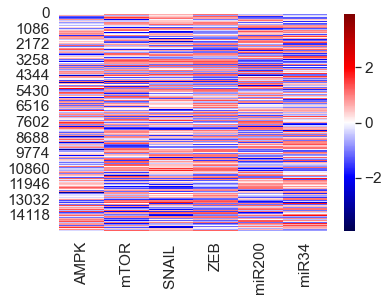

In [20]:
array_max_min = np.array([dd.max().max(), -1 * dd.min().min()]).max()
sns.set(font_scale=1.4)
ax = sns.heatmap(dd, cmap='seismic', vmin=-1 * array_max_min, vmax=array_max_min, annot_kws={"size": 16})

In [21]:
a=dd.sort_values('AMPK')
a

,AMPK,mTOR,SNAIL,ZEB,miR200,miR34
14792,-3.947484,0.969485,1.004146,1.247766,-2.135813,-1.335903
9634,-3.679967,1.050113,0.655555,0.965130,-0.889725,-0.469037
13957,-3.609665,1.554153,1.308911,0.814171,-1.260985,-0.962836
15030,-3.567958,0.344162,-0.839582,0.359180,-0.227467,1.623153
6051,-3.537134,1.255239,0.697099,1.188372,-1.462655,-0.994146
...,...,...,...,...,...,...
10949,2.873770,-1.125317,-1.022786,-1.810257,0.702848,0.651798
3660,2.898579,-1.776514,-1.031166,-0.858105,1.126272,0.729313
3201,2.995178,-1.381265,-2.056307,-1.260584,0.758268,1.072319
3084,3.018155,-1.696724,-1.412360,-1.028540,0.935449,0.738807


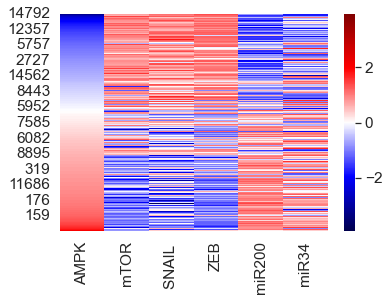

In [22]:
array_max_min = np.array([a.max().max(), -1 * a.min().min()]).max()
sns.set(font_scale=1.4)
ax = sns.heatmap(a, cmap='seismic', vmin=-1 * array_max_min, vmax=array_max_min, annot_kws={"size": 16})

In [23]:
b=grn.sort_values(by=['number of steady states', 'AMPK'], ascending=[True, True])
b=b.loc[:,'AMPK':'miR34']
b

,AMPK,mTOR,SNAIL,ZEB,miR200,miR34
14792,-3.947484,0.969485,1.004146,1.247766,-2.135813,-1.335903
9634,-3.679967,1.050113,0.655555,0.965130,-0.889725,-0.469037
13957,-3.609665,1.554153,1.308911,0.814171,-1.260985,-0.962836
15030,-3.567958,0.344162,-0.839582,0.359180,-0.227467,1.623153
6051,-3.537134,1.255239,0.697099,1.188372,-1.462655,-0.994146
...,...,...,...,...,...,...
8156,1.097980,-0.954666,-0.943807,-1.138353,0.976592,0.280699
3367,1.603348,-0.335399,0.380209,0.593983,-0.259022,-0.427679
3369,1.603348,-0.335399,0.380209,-0.434512,0.755004,-0.427679
3365,1.614774,-0.938450,-0.226700,-0.464355,0.879520,-0.069317


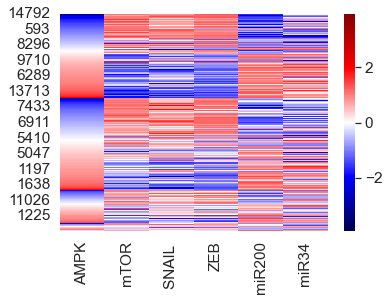

In [24]:
array_max_min = np.array([b.max().max(), -1 * b.min().min()]).max()
sns.set(font_scale=1.4)
ax = sns.heatmap(b, cmap='seismic', vmin=-1 * array_max_min, vmax=array_max_min, annot_kws={"size": 16})

In [25]:
sns.clustermap(dd, cmap="vlag", standard_scale=1, method='average', metric='euclidean')

RuntimeError: clustermap requires scipy to be available

In [27]:
print(scipy.__version__)

1.5.0


In [29]:
pip install --upgrade numpy scipy

Requirement already up-to-date: numpy in c:\users\parig\anaconda3\lib\site-packages (1.24.4)Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\parig\\anaconda3\\Lib\\site-packages\\~cipy\\sparse\\_sparsetools.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
